#  Classificação KNN

O KNN é um dos algoritmos mais simples para Machine Learning, sendo um algoritmo do tipo "lazy", ou seja, nenhuma computação é realizada no dataset até que um novo ponto de dado seja alvo de teste.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel("logi1.xlsx")
df.head()

,Score,Accepted
0,982,0
1,1304,1
2,1256,1
3,1562,1
4,703,0


In [3]:
len(df)

42

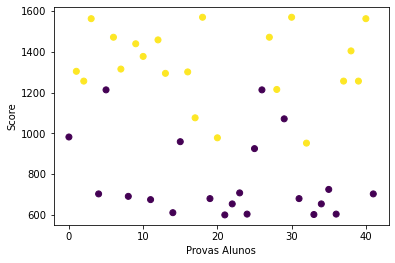

In [4]:
plt.scatter(df.index, df['Score'], c = df['Accepted'].astype('category').cat.codes)
plt.xlabel('Provas Alunos')
plt.ylabel('Score')
plt.show()

### Preparação do dados

In [5]:
X = df["Score"].values.reshape(-1, 1)
y = df["Accepted"]

In [6]:
print(X[:3])
print(y[:3])

[[ 982]
 [1304]
 [1256]]
0    0
1    1
2    1
Name: Accepted, dtype: int64


### Aplicacao do modelo

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
modelo = KNeighborsClassifier(n_neighbors=5)

In [9]:
modelo.fit(X,y)

KNeighborsClassifier()

## para acessar outras métricas de distância
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [10]:
metricas_distancias = ['euclidean',  'manhattan', 'minkowski', 'chebyshev',
                       'jaccard', 'hamming']

In [11]:
for metrica in metricas_distancias:
    modelo = KNeighborsClassifier(n_neighbors=5, metric=metrica)
    modelo.fit(X,y)
    print(metrica, sum(modelo.predict(X) == y) / len(X))

euclidean 0.8809523809523809
manhattan 0.8809523809523809
minkowski 0.8809523809523809
chebyshev 0.8809523809523809
jaccard 0.5
hamming 0.7380952380952381


In [12]:
for k in [1,3,5,7,9,11,13]:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    modelo.fit(X,y)
    print(k, sum(modelo.predict(X) == y) / len(X))

1 1.0
3 0.9047619047619048
5 0.8809523809523809
7 0.8809523809523809
9 0.8809523809523809
11 0.8809523809523809
13 0.8809523809523809


In [13]:
for k in [1,3,5,7,9,11,13]:
    modelo = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    modelo.fit(X,y)
    print(k, sum(modelo.predict(X) == y) / len(X))

1 1.0
3 0.9047619047619048
5 0.8809523809523809
7 0.8809523809523809
9 0.8809523809523809
11 0.8809523809523809
13 0.8809523809523809


### uso do modelo

#### modelo.predict()  retornará 1 ou 0 – (Accepted or Not)

In [14]:
valor = 1200
valor = np.array(valor).reshape(-1, 1)
modelo.predict(valor)

array([1])

In [15]:
valor = 1200
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor) # (23% de chance de não ser Aceito(0), 76% chance de ser  Aceito(1))

array([[0.23076923, 0.76923077]])

In [16]:
valor = 1800
valor = np.array(valor).reshape(-1, 1)
modelo.predict(valor)

array([1])

In [23]:
valor = 1300
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0.15384615, 0.84615385]])

In [24]:
valor = 550
valor = np.array(valor).reshape(-1, 1)
modelo.predict(valor)

array([0])

In [25]:
valor = 550
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[1., 0.]])

In [26]:
valor = 1190
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0.23076923, 0.76923077]])

## *** KNN - dados do Titanic***

In [27]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
len(df)

891

In [29]:
df['fsex'] = df.apply(lambda row: 0 if row['Sex'] == "male" else 1, axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fsex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### pclass- Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
### Survived: 0 = No, 1 = Yes

In [30]:
print("Número de passageiros= ",len(df))

Número de passageiros=  891


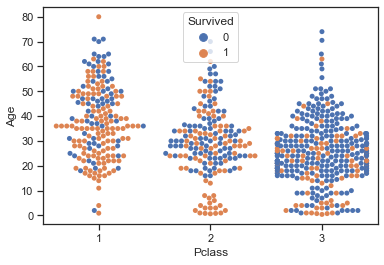

In [31]:
import seaborn as sns
sns.set(style="ticks")

#sns.boxplot(x='Age', y='Pclass', data=df, hue="Survived")
sns.swarmplot(y="Age", x="Pclass", hue="Survived", data=df)

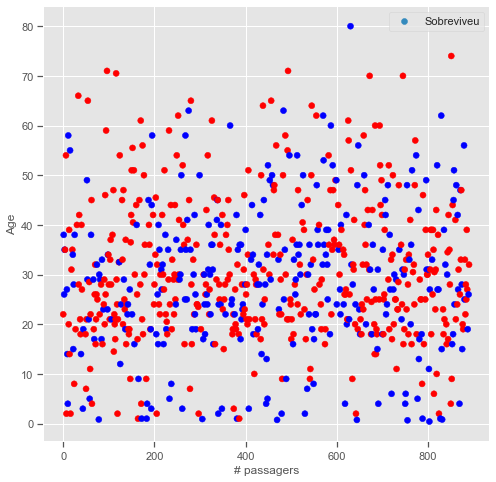

In [32]:
import matplotlib
fig = plt.figure(figsize=(8,8))
plt.style.use('ggplot')

colors = ['red', 'blue']
p = plt.scatter(   df.index, df.Age, c = df['Survived'], 
                cmap=matplotlib.colors.ListedColormap(colors)) #.astype('category').cat.codes);
plt.xlabel('# passagers')
plt.ylabel('Age')
plt.legend(["Sobreviveu", "Não Sobreviveu"])

plt.show()

In [33]:
X = df["Pclass"].values.reshape(-1, 1)
y = df["Survived"]

In [34]:
modelo = KNeighborsClassifier(n_neighbors=5)

In [35]:
modelo.fit(X,y)

KNeighborsClassifier()

# Métricas

In [38]:
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()
modelo.fit(X,y)

prediction = modelo.predict(X)
acc = metrics.accuracy_score(y, prediction)
print('Acurácia:', acc)
print('matriz de confusão:')
print(metrics.confusion_matrix(y, prediction))

Acurácia: 0.6790123456790124
matriz de confusão:
[[469  80]
 [206 136]]


In [39]:
# sobrevivente na 2a Classe
valor = 2
valor = np.array(valor).reshape(-1, 1)
modelo.predict(valor)

array([0])

In [40]:
# sobrevivente na 2a Classe
valor = 2
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0.56337582, 0.43662418]])

## remover valores missing - nan

In [42]:
df = df.dropna(axis=0, how='any')
len(df)

183

In [43]:
X = df["Age"].values.reshape(-1, 1)
y = df["Survived"]

In [44]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X,y)

KNeighborsClassifier()

In [45]:
valor = 30
valor = np.array(valor).reshape(-1, 1)
modelo.predict(valor)

array([1])

In [46]:
modelo.predict_proba(valor)

array([[0.4, 0.6]])

In [47]:
valor = 34
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0.2, 0.8]])

In [49]:
valor = 11
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0., 1.]])

In [50]:
valor = 50
valor = np.array(valor).reshape(-1, 1)
modelo.predict(valor)

array([0])

In [51]:
valor = 50
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0.6, 0.4]])

In [52]:
valor = 60
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0.6, 0.4]])

In [53]:
valor = 80
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0.8, 0.2]])

In [54]:
valor = 120
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0.8, 0.2]])

In [ ]:
# modelo 3 - fare (valor do ticket)

In [55]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [57]:
X = df["Fare"].values.reshape(-1, 1)
y = df["Survived"]

In [58]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X,y)

KNeighborsClassifier()

In [59]:
valor = 10.0
valor = np.array(valor).reshape(-1, 1)
modelo.predict(valor)

array([0])

In [60]:
valor = 10
valor = np.array(valor).reshape(-1, 1)
modelo.predict_proba(valor)

array([[0.8, 0.2]])

In [61]:
valor = 200 # 56
valor = np.array(valor).reshape(-1, 1)
print(modelo.predict(valor), modelo.predict_proba(valor))

[1] [[0.4 0.6]]


In [62]:
# valor pago do ticket do titatic
valores = [10, 30, 50, 70, 100, 200, 300, 400, 512 ]
for valor in valores:
    valor = np.array(valor).reshape(-1, 1)
    previsao = modelo.predict(valor)
    if previsao == 0:
        passageiro = "Morrer"
    else:
        passageiro = "Sobreviver"
        
    print("$",valor[0][0],passageiro, modelo.predict_proba(valor)[0])

$ 10 Morrer [0.8 0.2]
$ 30 Sobreviver [0.2 0.8]
$ 50 Morrer [0.6 0.4]
$ 70 Morrer [1. 0.]
$ 100 Sobreviver [0.2 0.8]
$ 200 Sobreviver [0.4 0.6]
$ 300 Sobreviver [0.4 0.6]
$ 400 Sobreviver [0.2 0.8]
$ 512 Sobreviver [0.2 0.8]


In [63]:
df = df.dropna(axis=0, how='any')
df['fsex'] = df.apply(lambda row: 0 if row['Sex'] == "male" else 1, axis=1)
atributos = ['Pclass', 'Age', 'SibSp', 'Fare', 'fsex']
X = df.loc[:, atributos].values
y = df["Survived"]
len(df)

183

In [64]:
X[:3]

array([[ 1.    , 38.    ,  1.    , 71.2833,  1.    ],
       [ 1.    , 35.    ,  1.    , 53.1   ,  1.    ],
       [ 1.    , 54.    ,  0.    , 51.8625,  0.    ]])

In [65]:
y[:3]

1    1
3    1
6    0
Name: Survived, dtype: int64

In [66]:
X.shape

(183, 5)

In [67]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X,y)

KNeighborsClassifier()

In [68]:
dados = np.array([2, 20, 1, 50, 1])
dados = dados.reshape(1, -1)
dados
modelo.predict(dados), modelo.predict_proba(dados)

(array([1]), array([[0.2, 0.8]]))

In [69]:
                # ['Pclass', 'Age', 'SibSp', 'Fare', 'fsex']
dados = np.array([ 3,         50,     1,      40,      1])
dados = dados.reshape(1, -1)
# valor pago do ticket do titatic
previsao = modelo.predict(dados)
if previsao == 0:
    passageiro = "Morrer"
else:
    passageiro = "Sobreviver"
        
print("$", passageiro, modelo.predict_proba(dados)[0])

$ Morrer [0.6 0.4]


## Normalizar os dados (Usar mais de uma variável preditora)

In [70]:
df = pd.read_excel("dados.xlsx")
df

,Altura,Peso,Salario
0,1.77,90,10000
1,1.52,51,990
2,1.62,57,2000
3,1.82,95,3000
4,1.55,53,1200
5,1.93,100,5000


### Normalizacao de dados - forma 1

In [71]:
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm

,Altura,Peso,Salario
0,0.166667,0.319728,0.699408
1,-0.443089,-0.476190,-0.300592
2,-0.199187,-0.353741,-0.188494
3,0.288618,0.421769,-0.077506
4,-0.369919,-0.435374,-0.277284
5,0.556911,0.523810,0.144469


### Normalizacao de dados - forma 2

In [72]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = ["Altura", "Peso", "Salario"]
df_normalized

,Altura,Peso,Salario
0,0.609756,0.795918,1.000000
1,0.000000,0.000000,0.000000
2,0.243902,0.122449,0.112098
3,0.731707,0.897959,0.223085
4,0.073171,0.040816,0.023307
5,1.000000,1.000000,0.445061


### Executar o Modelo para k= 7 e k = 9 (titanic) e exibir métricas (acurária, matriz de confusão)